# 📊 Carga y análisis(L - Load & Analysis)

# 1. Análisis descriptivo

En esta sección obtendremos una visión general de nuestro dataset:

- Métricas de tendencia central (media, mediana).
- Medidas de dispersión (desviación estándar, mínimo, máximo).
- Conteo de valores faltantes por columna.
- Cardinalidad de las variables categóricas.

> 📌 Trabajaremos con los DataSet creados en el notebook `02_data_cleaning.ipynb`.
  


#### Carga del DataFrame

In [24]:
# Cargar dataset limpio
import pandas as pd

DATA_DIR = "/content/drive/MyDrive/challenge-TelecomX-ETL/data/processed"
df_clean = pd.read_csv(f"{DATA_DIR}/telecom_df_clean.csv")

In [25]:
# Separar columnas numéricas y categóricas
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_clean.select_dtypes(include='object').columns

In [26]:
# --- Análisis descriptivo de numéricas ---

df_clean[num_cols].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035,2.157337
std,0.369074,24.571773,30.129572,2268.648587,1.004319
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.425000,396.200000,1.180833
50%,0.000000,29.000000,70.300000,1389.200000,2.343333
75%,0.000000,55.000000,89.875000,3778.525000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [27]:
# --- Análisis descriptivo de numéricas ---

desc_num = df_clean[num_cols].describe().T
desc_num['median'] = df_clean[num_cols].median()
desc_num['missing'] = df_clean[num_cols].isna().sum()

print("📊 Métricas de columnas numéricas:")
display(desc_num)

📊 Métricas de columnas numéricas:


,count,mean,std,min,25%,50%,75%,max,median,missing
SeniorCitizen,7267.0,0.162653,0.369074,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0
tenure,7267.0,32.346498,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000,29.000000,0
MonthlyCharges,7267.0,64.720098,30.129572,18.250000,35.425000,70.300000,89.875000,118.750000,70.300000,0
TotalCharges,7267.0,2277.182035,2268.648587,0.000000,396.200000,1389.200000,3778.525000,8684.800000,1389.200000,0
Cuentas_Diarias,7267.0,2.157337,1.004319,0.608333,1.180833,2.343333,2.995833,3.958333,2.343333,0


In [30]:
# --- Análisis de categóricas ---

df_clean[cat_cols].describe()


,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7267,7043,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,2,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5174,3675,3749,5086,6560,4202,3198,5189,4763,4776,5163,4477,4451,4005,4311,2445


In [31]:
# --- Análisis de categóricas ---
cat_info = pd.DataFrame({
    'unique_levels': [df_clean[c].nunique(dropna=False) for c in cat_cols],
    'missing': [df_clean[c].isna().sum() for c in cat_cols]
}, index=cat_cols).sort_values(by='unique_levels', ascending=False)

print("\n📊 Cardinalidad y valores faltantes en columnas categóricas:")
display(cat_info)


📊 Cardinalidad y valores faltantes en columnas categóricas:


,unique_levels,missing
customerID,7267,0
PaymentMethod,4,0
Churn,3,224
Contract,3,0
InternetService,3,0
Dependents,2,0
PhoneService,2,0
Partner,2,0
gender,2,0
OnlineSecurity,2,0


In [32]:
# Vista previa del dataset
df_clean.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


#### **Interpretación rápida**


##### **Variables numéricas**
- **SeniorCitizen** → La mayoría absoluta de clientes son no seniors (media ≈ 0.16).  
- **tenure** → gran rango (0 a 72 meses), mediana 29 meses; esto nos indica clientes nuevos y otros muy antiguos.  
- **MonthlyCharges** → media ≈ 64.7, pero con fuerte dispersión ($18.25 a $118.75).  
- **TotalCharges** → rango amplio (0 a 8,684)
- **Cuentas_Diarias** → media ≈ $2.15 $/día; proporcional a MonthlyCharges.

##### Variables categóricas  
- **Churn** → 224 valores desconocidos (estos quedarán fuera del análisis principal en `telecom_df_bin.csv`).  
- **customerID** → única por cliente.  
- **PaymentMethod**, **Contract**, **InternetService** → buena variabilidad para segmentar.  
- El resto de columnas categóricas son binarias tipo Yes/No.

---

> 💡 **Insight inicial**: El dataset tiene un balance adecuado entre variables, lo que permite hacer diferentes análisis tanto por perfiles como por métricas de consumo.



## 2. Distribución de evasión

Analizamos la proporción de clientes que permanecen (`Churn = 0`) y los que se dieron de baja (`Churn = 1`).

- Usamos `telecom_df_bin` porque tiene la culumna `Churn` en formato binario (0/1) y sin valores faltantes.
- Visualizamos tanto el conteo absoluto como la proporción.

📊 Conteo de clientes por estado de Churn:


📈  Tasa de evasión: 26.54%: 



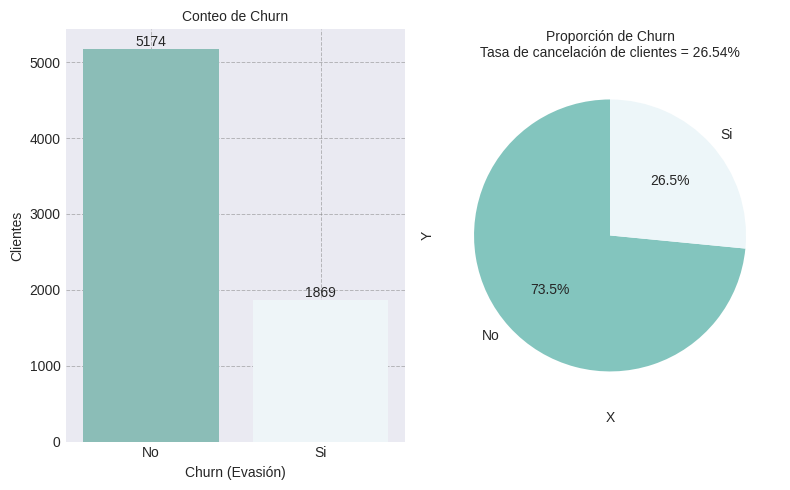

In [112]:
# Cargar dataset binario `telecom_df_bin.csv`

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_DIR = "/content/drive/MyDrive/challenge-TelecomX-ETL/data/processed"
df_bin = pd.read_csv(f"{DATA_DIR}/telecom_df_bin.csv")

# Conteo y prporcion

churn_counts = df_bin['Churn'].value_counts()
churn_rate = df_bin['Churn'].mean()

print("📊 Conteo de clientes por estado de Churn:\n")
print(f"\n📈  Tasa de evasión: {churn_rate:.2%}: \n")


# Graficos

fig, ax = plt.subplots(1, 2, figsize=(8,5))
sns.despine()
plt.style.use('seaborn-v0_8-darkgrid')
plt.xlabel('X', family='sans-serif')
plt.ylabel('Y', family='sans-serif')
plt.grid()
coloors = ["#83c5be","#edf6f9"]

# Conteo
sns.countplot(x='Churn', hue='Churn', data=df_bin, ax=ax[0],
              palette=coloors, legend=False)
ax[0].set_title('Conteo de Churn', fontsize=10)
ax[0].bar_label(ax[0].containers[0])
ax[0].bar_label(ax[0].containers[1])
ax[0].set_xlabel('Churn (Evasión)')
ax[0].set_ylabel('Clientes')

ax[0].set_xticks([0, 1])  # Fijar los ticks en las posiciones 0 y 1
ax[0].set_xticklabels(['No', 'Si'])
ax[0].grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.5)


# Proporcion

ax[1].pie(churn_counts, labels=['No', 'Si'], autopct='%1.1f%%',
          colors=coloors, startangle=90)
ax[1].set_title(f'Proporción de Churn\nTasa de cancelación de clientes = {churn_rate:.2%}', fontsize=10)

plt.tight_layout()
plt.show()



In [94]:
df_bin['Churn'].value_counts()

,count
Churn,
0.0,5174
1.0,1869


## 2.1 Distribución de evasión con Plotly

Usamos `telecom_df_bin` para graficar la proporción de clientes que permanecen (Churn = 0)  
y los que se dan de baja (Churn = 1) en un gráfico de pastel interactivo.

In [115]:
import plotly.express as px
import pandas as pd

# Cargar dataset binario
DATA_DIR = "/content/drive/MyDrive/challenge-TelecomX-ETL/data/processed"
df_bin = pd.read_csv(f"{DATA_DIR}/telecom_df_bin.csv")

# Conteo de Churn
churn_counts = df_bin['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'count']
churn_counts['Churn'] = churn_counts['Churn'].map({0: 'No', 1: 'Sí'})

# Gráfico interactivo de pastel
fig = px.pie(
    churn_counts,
    values='count',
    names='Churn',
    color='Churn',
    color_discrete_map={'No': '#ff9e00', 'Sí': '#5a189a'},
    title='Proporción de clientes por estado de Churn (evasión)',
    hole=0.3,
)

fig.update_layout(
    width=500,   # Ancho del gráfico
    height=400,  # Alto del gráfico
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## 3. Recuento de evasión por variables categóricas

En esta sección analizamos cómo varía la tasa de `Churn` según diferentes variables categóricas.

Se emplean **tres enfoques de visualización**:
1. **Matplotlib** → Barras apiladas para comparar volumen de clientes con y sin churn por categoría.
2. **Seaborn** → Barras con la tasa de churn ordenadas de mayor a menor.
3. **Plotly** → Gráficos interactivos, tanto de tasa como de conteo, para facilitar la exploración.



### 3.1Configuración
- Definimos una paleta de colores modificable (`COLOR_NO`, `COLOR_SI`) para distinguir entre clientes que permanecen y los que se dan de baja.
- Seleccionamos un conjunto de columnas categóricas de interés:  
  `Contract`, `PaymentMethod`, `InternetService`, `OnlineSecurity`, `TechSupport`, `PaperlessBilling`, `MultipleLines`, `StreamingTV`, `StreamingMovies`, `gender`.

In [142]:
# Configuración de colores
COLOR_NO = "#2a9d8f"   # color para Churn=0
COLOR_SI = "#e76f51"   # color para Churn=1
CATEGORICAL_PALETTE = "viridis"  # paleta de Seaborn para barras por categoría

# Columnas a analizar
cat_focus = [
    "Contract", "PaymentMethod", "InternetService",
    "OnlineSecurity", "TechSupport", "PaperlessBilling",
    "MultipleLines", "StreamingTV", "StreamingMovies", "gender"
]

# Carga de datasets
import pandas as pd
DATA_DIR = "/content/drive/MyDrive/challenge-TelecomX-ETL/data/processed"
df_clean = pd.read_csv(f"{DATA_DIR}/telecom_df_clean.csv")
df_bin   = pd.read_csv(f"{DATA_DIR}/telecom_df_bin.csv")

### 3.2 Procedimiento
- **Tabla resumen**: cálculo de la tasa de churn (`mean`) y el número de clientes (`n`) por categoría, ordenadas por mayor tasa de churn.


In [117]:
import numpy as pd

def churn_rate_table(df, col):
  out = (df.groupby(col)["Churn"]
         .agg(rate="mean", n="count")
         .sort_values(by="rate", ascending=False))
  return out

  tablas_summary = {c: churn_rate_table(df_bin, c) for c in cat_focus if c in df_bin.columns}
  for c, tab in tablas_summary.items():
    print(f"\nTabla resumen para {c}:\n")
    display(tab)


### **3.3 Gráfico Matplotlib**: barras apiladas mostrando conteos absolutos de churn vs no churn por categoría.


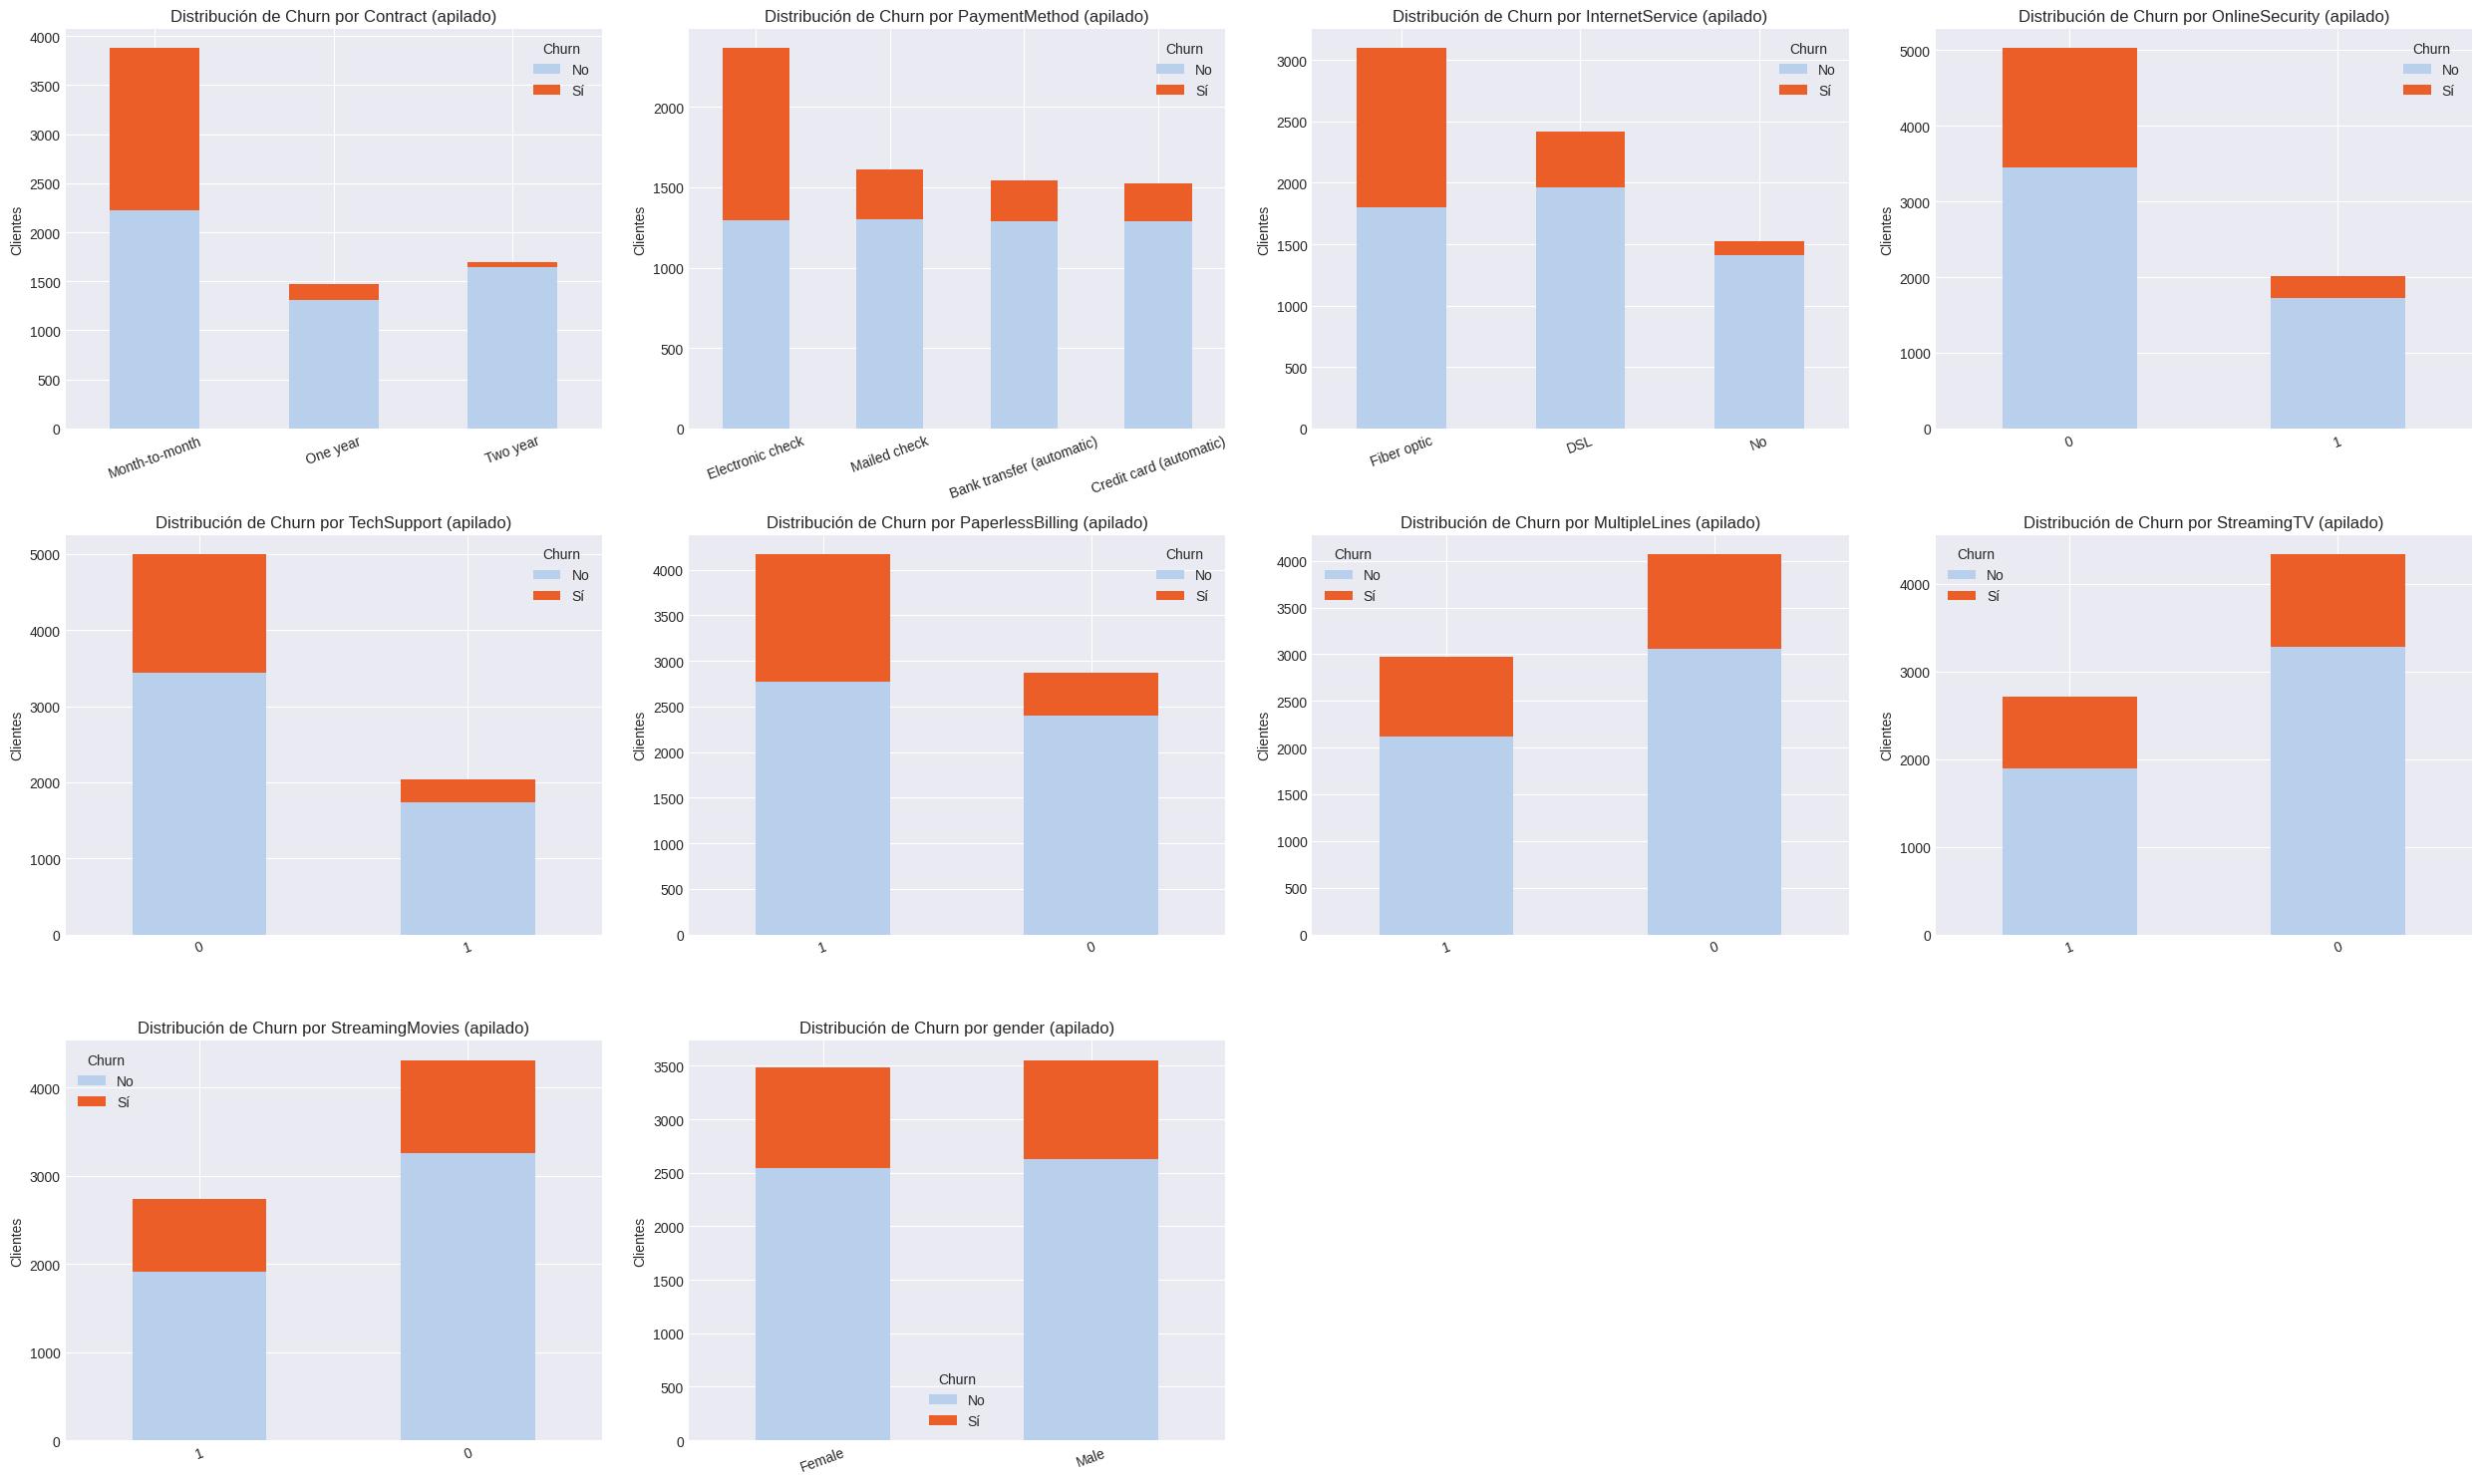

In [146]:
import matplotlib.pyplot as plt

COLOR_NO = "#b8d0eb"   # color para Churn=0
COLOR_SI = "#eb5e28"   # color para Churn=1

# Número de columnas para los subplots
num_columns = 4
num_rows = (len(cat_focus) + num_columns - 1) // num_columns  # Calcula el número de filas necesarias

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 4 * num_rows))  # Ajusta el tamaño de la figura


axes = axes.flatten()

for i, col in enumerate(cat_focus):
    if col not in df_bin.columns:
        continue

    counts = (df_bin
              .groupby([col, "Churn"])
              .size()
              .unstack(fill_value=0)
              .rename(columns={0:"No", 1:"Sí"}))

    # Asegurar orden por mayor tasa de churn
    order = (counts["Sí"] / counts.sum(axis=1)).sort_values(ascending=False).index
    counts = counts.loc[order]

    ax = axes[i]  # Obtener el eje correspondiente
    counts.plot(kind="bar", stacked=True, color=[COLOR_NO, COLOR_SI], ax=ax, figsize=(25, 15))

    ax.set_title(f"Distribución de Churn por {col} (apilado)")
    ax.set_xlabel("")
    ax.set_ylabel("Clientes")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

    ax.legend(title="Churn")

# Eliminar los subgráficos no utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### **3.4 Gráfico Seaborn**: barras con la tasa de churn por categoría

Eje Y ("Tasa de Churn"): Este eje muestra la tasa de churn para cada categoría de la columna. La tasa de churn es el porcentaje de clientes que dejaron el servicio, donde un valor cercano a 1 (o 100%) indica una tasa de churn muy alta, y un valor cercano a 0 (o 0%) indica que la mayoría de los clientes permanecen en el servicio.

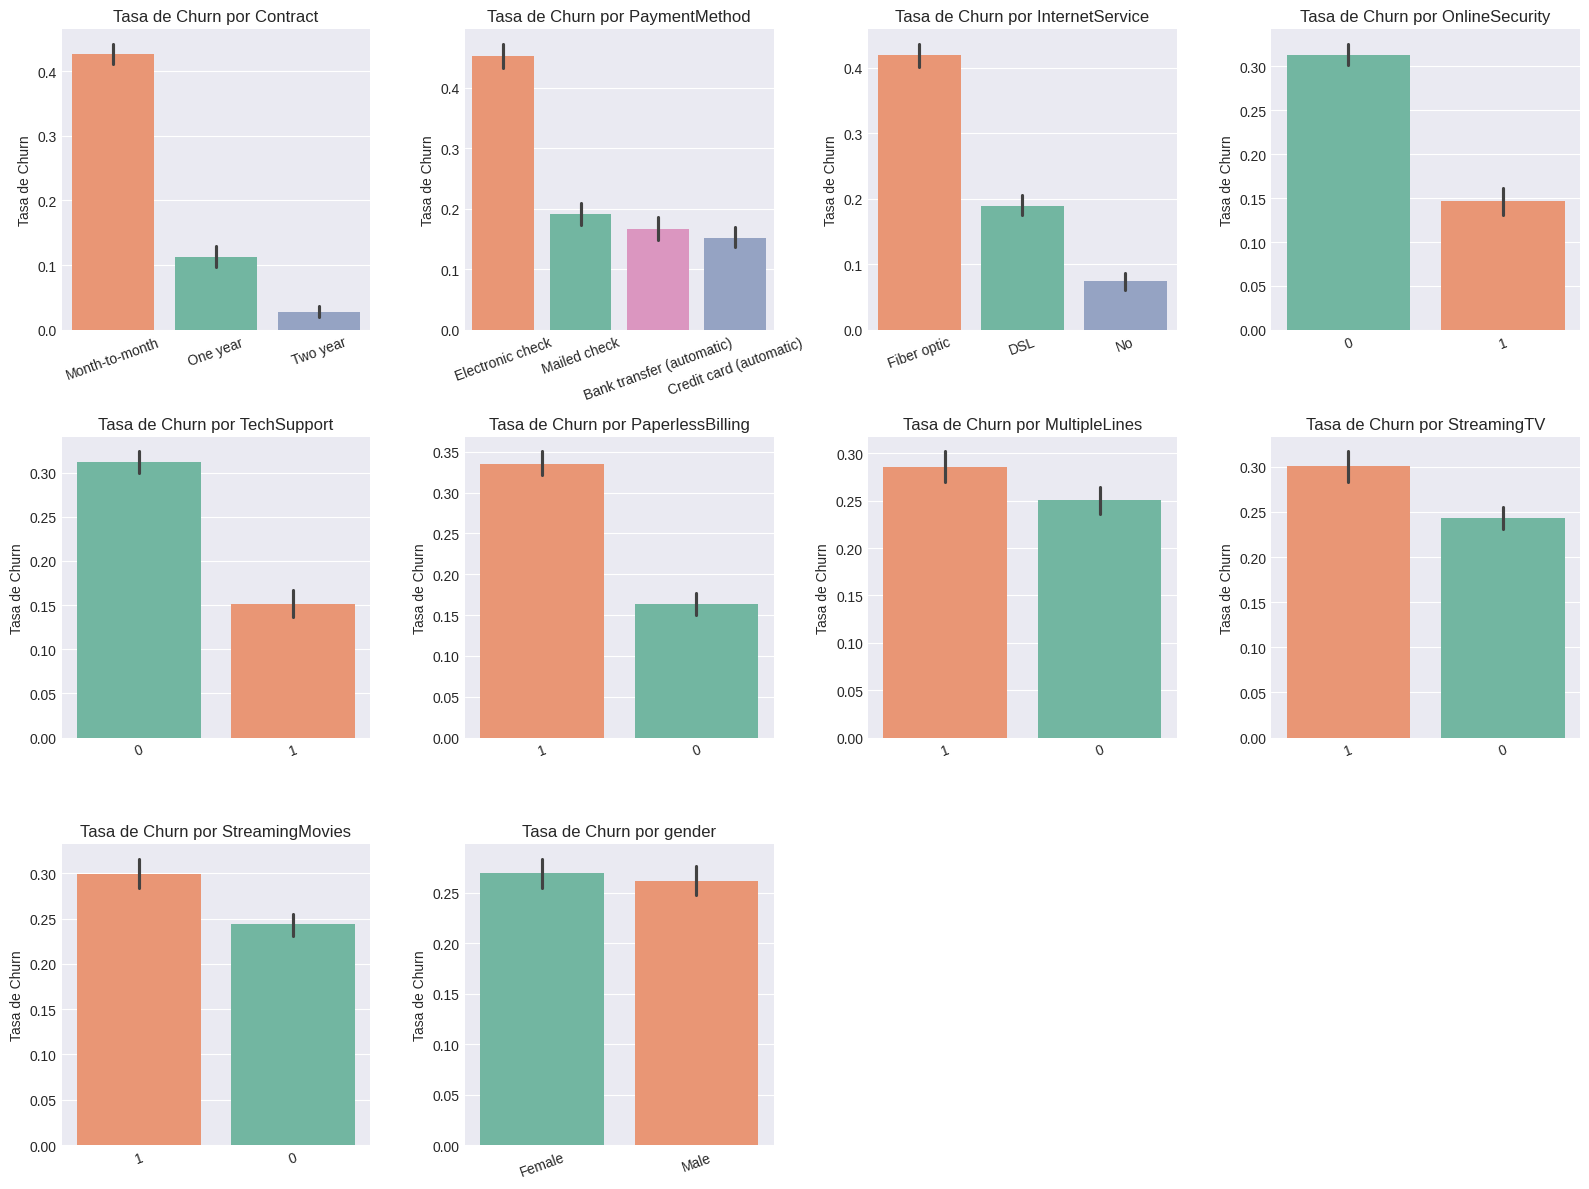

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Número de columnas para los subplots
num_columns = 4
num_rows = (len(cat_focus) + num_columns - 1) // num_columns  # Calcula el número de filas necesarias

# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 4 * num_rows))

# Aplanar el arreglo de ejes para facilitar el acceso
axes = axes.flatten()

for i, col in enumerate(cat_focus):
    if col not in df_bin.columns:
        continue

    # Calcular tasa de churn para cada categoría
    rate = df_bin.groupby(col)['Churn'].mean().reset_index()
    order = rate.sort_values('Churn', ascending=False)[col]

    # Asignar el gráfico a un eje específico
    ax = axes[i]  # Obtener el eje correspondiente
    sns.barplot(data=df_bin, x=col, y='Churn', order=order, palette="Set2", hue=col, legend=False, ax=ax)

    # Configurar título y etiquetas
    ax.set_title(f"Tasa de Churn por {col}")
    ax.set_ylabel("Tasa de Churn")
    ax.set_xlabel("")
    ax.set_xticks(range(len(order)))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

# Eliminar los subgráficos no utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Ajustar el diseño para que no se solapen los elementos
plt.show()


### **Gráfico Plotly**:
  - Barra de tasas, con hover para ver la cifra exacta.
  - Barra de conteos por estado (`No`, `Sí`) con colores personalizados.

In [169]:
import plotly.express as px

custom_palette = ["d6ffb7", "f5ff90", "ffc15e", "ff9f1c", "080357"]
COLOR_NO = "#CBD4C2"   # color para Churn=0
COLOR_SI = "#E15554"   # color para Churn=1

for col in cat_focus:
    if col not in df_bin.columns:
        continue

    # Tasa de churn
    rate = df_bin.groupby(col)["Churn"].mean().reset_index()
    fig_rate = px.bar(
        rate.sort_values("Churn", ascending=False),
        x=col, y="Churn",
        title=f"Tasa de Churn por {col}",
        color="Churn",
        color_continuous_scale="oryel",
        text="Churn"
    )
    fig_rate.update_traces(texttemplate='%{text:.2f}', textposition='outside')
    fig_rate.update_layout(
        autosize=True,  # Activa el ajuste automático del tamaño
        margin=dict(l=30, r=30, t=60, b=30),  # Margen personalizado
        showlegend=False,  # No mostrar la leyenda global
        width= 500,   # Ancho del gráfico
        height= 400,  # Alto del gráfico
    )
    fig_rate.show()


    # Conteo por estado
    counts = (df_bin
              .groupby([col, "Churn"])
              .size()
              .reset_index(name="count"))
    counts["Churn"] = counts["Churn"].map({0:"No", 1:"Sí"})

    fig_cnt = px.bar(
        counts, x=col, y="count", color="Churn",
        barmode="group",
        color_discrete_map={"No": COLOR_NO, "Sí": COLOR_SI},
        title=f"Conteo de clientes por {col} y estado de Churn",
        text="count"
    )
    fig_cnt.update_traces(textposition="outside")


    fig_cnt.update_layout(
        width= 600,     # Ancho del gráfico
        height= 500,    # Alto del gráfico

    )

    fig_cnt.show()